In [1]:
import pandas as pd

In [19]:
# 2024-02-29 -- 2024-06-29
# 2025-02-28 -- 2025-05-21

data = pd.read_csv('data_ready.csv')
data.head()

,date,Affogato,Afocado Coffee,Air mineral,Alpukat,Americano - Dingin,Americano - Panas,Apel,Avocado Latte - Boba,Avocado Latte - Choco Chip,...,apparent_temperature_max,apparent_temperature_min,rain_sum,precipitation_sum,precipitation_hours,cafe_value,mkn_hemat_value,minum_segar_value,wfc_value,wfh_value
0,2024-02-29,0.0,0.0,1245.0,996.0,0.0,0.0,249.0,0.0,0.0,...,38.2,30.9,0.4,0.4,2,55,0,21,58,70
1,2024-03-01,0.0,0.0,747.0,5478.0,0.0,0.0,0.0,0.0,0.0,...,38.2,30.6,2.8,2.8,4,62,0,25,0,70
2,2024-03-02,0.0,0.0,1494.0,11952.0,249.0,249.0,249.0,0.0,0.0,...,35.7,30.6,2.8,2.8,6,78,0,22,0,53
3,2024-03-03,0.0,0.0,4233.0,10458.0,0.0,0.0,0.0,0.0,0.0,...,36.2,29.8,11.3,11.3,10,72,0,29,64,59
4,2024-03-04,0.0,0.0,249.0,6972.0,0.0,498.0,249.0,0.0,0.0,...,38.7,31.1,3.2,3.2,11,55,0,16,0,60


In [20]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Hapus baris di mana konversi tanggal gagal (opsional, tergantung data Anda)
data.dropna(subset=['date'], inplace=True)
data = data.set_index('date')


In [21]:
start_date_1 = '2024-02-29'
end_date_1 = '2024-06-29'
start_date_2 = '2025-02-28'
end_date_2 = '2025-05-21'

data_period_1 = data.loc[start_date_1:end_date_1]
data_period_2 = data.loc[start_date_2:end_date_2]

In [39]:
x = data.iloc[:, -12:]
y = data.iloc[:, :-12]

In [51]:
x = data_period_1.iloc[:, -12:].values
y = data_period_1.iloc[:, :-12].values

# Scaling
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
x_scaled = scaler_x.fit_transform(x)
y_scaled = scaler_y.fit_transform(y)

Period 1 (Training): (142, 248) - 2024-02-29 00:00:00 to 2024-06-29 00:00:00
Period 2 (Testing): (73, 248) - 2025-02-28 00:00:00 to 2025-05-21 00:00:00

🔄 COMBINING BOTH PERIODS FOR BETTER TRAINING...
Combined data: (215, 248) - 2024-02-29 00:00:00 to 2025-05-21 00:00:00
Features: ['temperature_2m_max', 'temperature_2m_min', 'apparent_temperature_max', 'apparent_temperature_min', 'rain_sum', 'precipitation_sum', 'precipitation_hours', 'cafe_value', 'mkn_hemat_value', 'minum_segar_value', 'wfc_value', 'wfh_value']
Number of products: 236
Selected top 50 products for modeling

🔧 BUILDING COMPREHENSIVE FEATURE SET...
Comprehensive features shape: (215, 373)
Target shape: (215, 50)
Feature breakdown: Weather=12, Time=11, Lagged=150, Rolling=200
LSTM input shape: (194, 21, 373)
LSTM output shape: (194, 50)
Training samples: 135
Validation samples: 29
Test samples: 30

🏗️ BUILDING ADVANCED MODEL...

📊 MODEL ARCHITECTURE:


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_19 (LSTM)                  │ (None, 21, 256)        │       645,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 21, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_20 (LSTM)                  │ (None, 21, 128)        │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 21, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_21 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 50)             │         3,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 955,506 (3.64 MB)

 Trainable params: 954,098 (3.64 MB)

 Non-trainable params: 1,408 (5.50 KB)


🚀 TRAINING ADVANCED MODEL...
Epoch 1/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - loss: 1.3592 - mae: 0.8511 - val_loss: 0.6905 - val_mae: 0.5557 - learning_rate: 0.0010
Epoch 2/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 1.0047 - mae: 0.6947 - val_loss: 0.6907 - val_mae: 0.5550 - learning_rate: 0.0010
Epoch 3/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.8984 - mae: 0.6442 - val_loss: 0.6931 - val_mae: 0.5559 - learning_rate: 0.0010
Epoch 4/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.8569 - mae: 0.6139 - val_loss: 0.6934 - val_mae: 0.5560 - learning_rate: 0.0010
Epoch 5/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.8195 - mae: 0.5888 - val_loss: 0.6928 - val_mae: 0.5561 - learning_rate: 0.0010
Epoch 6/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.7995 - mae: 0.5785 - val_loss: 0.6937 - val_mae: 0.5563 - learning_rate: 0.0010
Epoch 7/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.7949 - mae: 0.5726 - val_loss: 0.6939 - val_mae: 0.5562 - learning_ra

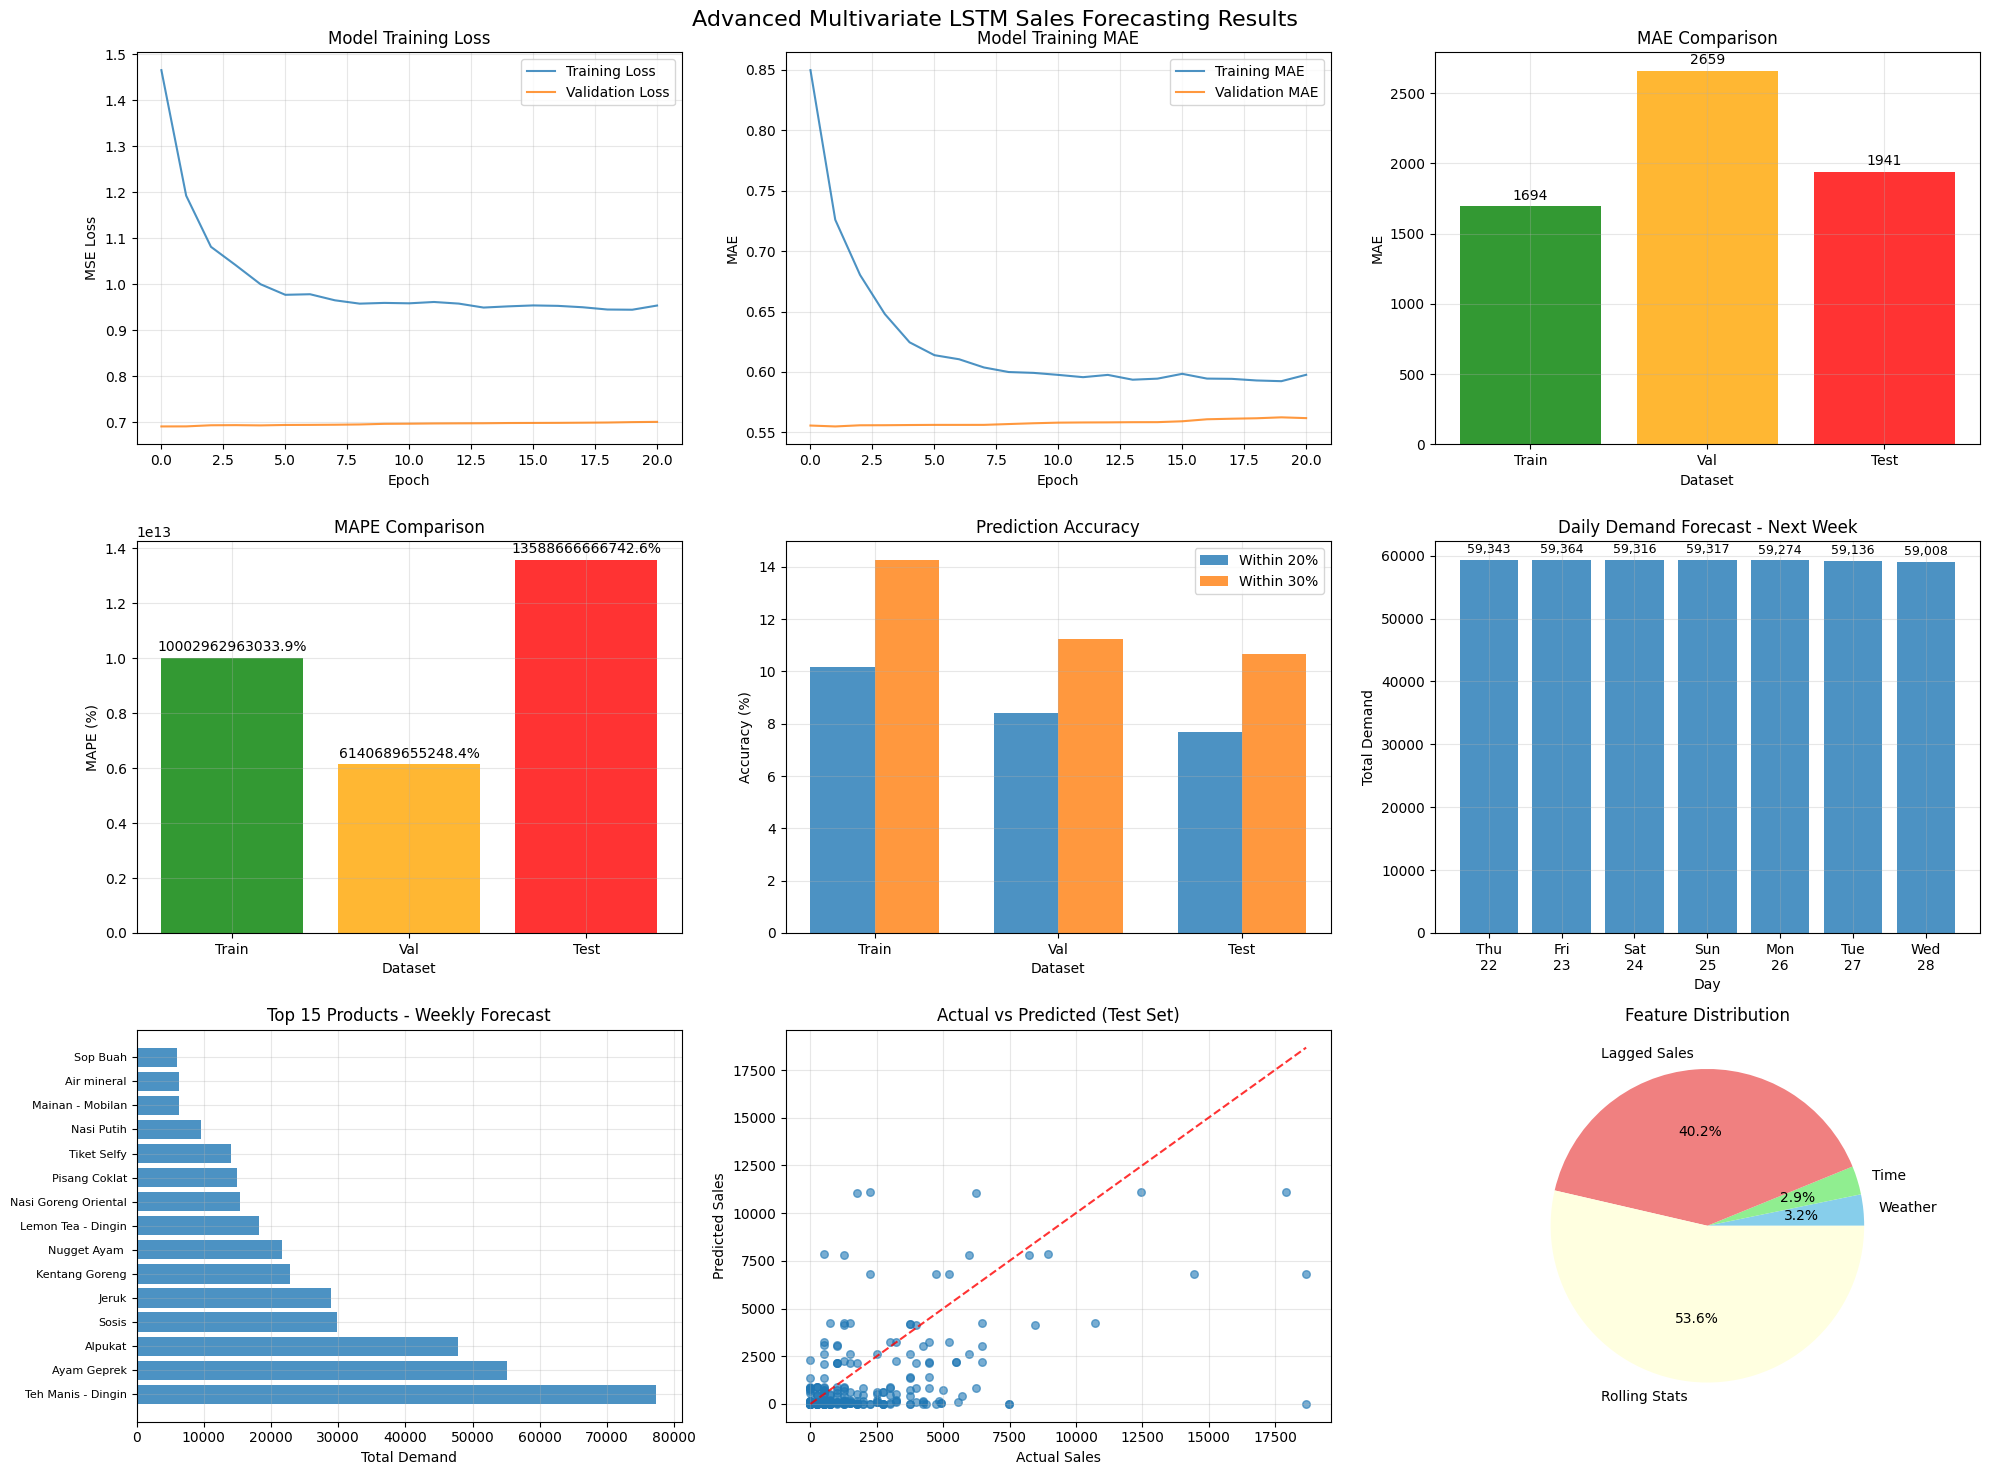

In [94]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, GRU
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load data
data = pd.read_csv('data_ready.csv')
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data.dropna(subset=['date'], inplace=True)
data = data.set_index('date')

# Define periods
start_date_1 = '2024-02-29'
end_date_1 = '2024-06-29'
start_date_2 = '2025-02-28'
end_date_2 = '2025-05-21'

data_period_1 = data.loc[start_date_1:end_date_1]
data_period_2 = data.loc[start_date_2:end_date_2]

print(f"Period 1 (Training): {data_period_1.shape} - {data_period_1.index[0]} to {data_period_1.index[-1]}")
print(f"Period 2 (Testing): {data_period_2.shape} - {data_period_2.index[0]} to {data_period_2.index[-1]}")

# Combine both periods for more training data
print("\n🔄 COMBINING BOTH PERIODS FOR BETTER TRAINING...")
data_combined = pd.concat([data_period_1, data_period_2])
data_combined = data_combined.sort_index()

print(f"Combined data: {data_combined.shape} - {data_combined.index[0]} to {data_combined.index[-1]}")

# Features and targets
x = data_combined.iloc[:, -12:].values  # Weather features
y = data_combined.iloc[:, :-12].values  # Product sales

product_names = data_combined.columns[:-12].tolist()
feature_names = data_combined.columns[-12:].tolist()

print(f"Features: {feature_names}")
print(f"Number of products: {len(product_names)}")

# ==========================================
# IMPROVED DATA PREPROCESSING
# ==========================================

def advanced_outlier_removal(y, method='iqr', threshold=2.0):
    """Advanced outlier removal with multiple methods"""
    y_cleaned = y.copy()
    
    for i in range(y.shape[1]):
        product_sales = y[:, i]
        
        if method == 'iqr':
            Q1 = np.percentile(product_sales, 25)
            Q3 = np.percentile(product_sales, 75)
            IQR = Q3 - Q1
            lower_bound = max(0, Q1 - 1.5 * IQR)
            upper_bound = Q3 + 1.5 * IQR
            
        elif method == 'zscore':
            mean_val = np.mean(product_sales)
            std_val = np.std(product_sales)
            lower_bound = max(0, mean_val - threshold * std_val)
            upper_bound = mean_val + threshold * std_val
            
        elif method == 'percentile':
            lower_bound = np.percentile(product_sales, 5)
            upper_bound = np.percentile(product_sales, 95)
        
        # Clip outliers
        y_cleaned[:, i] = np.clip(product_sales, lower_bound, upper_bound)
    
    return y_cleaned

def add_lag_features(data, lags=[1, 3, 7]):
    """Add lagged sales features"""
    lagged_data = []
    
    for lag in lags:
        lagged = np.roll(data, lag, axis=0)
        lagged[:lag] = 0  # Fill initial values with 0
        lagged_data.append(lagged)
    
    return np.concatenate(lagged_data, axis=1)

def add_rolling_features(data, windows=[3, 7, 14]):
    """Add rolling statistics"""
    rolling_features = []
    
    for window in windows:
        # Rolling mean
        rolling_mean = pd.DataFrame(data).rolling(window=window, min_periods=1).mean().values
        # Rolling std
        rolling_std = pd.DataFrame(data).rolling(window=window, min_periods=1).std().fillna(0).values
        
        rolling_features.extend([rolling_mean, rolling_std])
    
    return np.concatenate(rolling_features, axis=1)

def add_enhanced_time_features(dates):
    """Enhanced time features"""
    df_time = pd.DataFrame(index=dates)
    
    # Basic time features
    df_time['day_of_week'] = dates.dayofweek
    df_time['day_of_month'] = dates.day
    df_time['month'] = dates.month
    df_time['quarter'] = dates.quarter
    df_time['day_of_year'] = dates.dayofyear
    
    # Weekend indicator
    df_time['is_weekend'] = (dates.dayofweek >= 5).astype(int)
    
    # Month indicators (seasonal patterns)
    df_time['is_month_start'] = (dates.day <= 7).astype(int)
    df_time['is_month_end'] = (dates.day >= 25).astype(int)
    
    # Cyclical encoding for better periodicity capture
    df_time['day_of_week_sin'] = np.sin(2 * np.pi * df_time['day_of_week'] / 7)
    df_time['day_of_week_cos'] = np.cos(2 * np.pi * df_time['day_of_week'] / 7)
    df_time['day_of_month_sin'] = np.sin(2 * np.pi * df_time['day_of_month'] / 31)
    df_time['day_of_month_cos'] = np.cos(2 * np.pi * df_time['day_of_month'] / 31)
    df_time['month_sin'] = np.sin(2 * np.pi * df_time['month'] / 12)
    df_time['month_cos'] = np.cos(2 * np.pi * df_time['month'] / 12)
    df_time['quarter_sin'] = np.sin(2 * np.pi * df_time['quarter'] / 4)
    df_time['quarter_cos'] = np.cos(2 * np.pi * df_time['quarter'] / 4)
    
    return df_time.drop(['day_of_week', 'day_of_month', 'month', 'quarter', 'day_of_year'], axis=1).values

# ==========================================
# MULTIVARIATE APPROACH - FOCUS ON TOP PRODUCTS
# ==========================================

# Select top selling products to reduce noise
product_totals = np.sum(y, axis=0)
top_product_indices = np.argsort(product_totals)[-50:]  # Top 50 products
y_top = y[:, top_product_indices]
top_product_names = [product_names[i] for i in top_product_indices]

print(f"Selected top {len(top_product_names)} products for modeling")

# Clean outliers
y_cleaned = advanced_outlier_removal(y_top, method='iqr', threshold=2.0)

# Add enhanced time features
time_features = add_enhanced_time_features(data_combined.index)

# Create comprehensive feature set
print("\n🔧 BUILDING COMPREHENSIVE FEATURE SET...")

# Add lagged sales features (using cleaned sales data)
lagged_sales = add_lag_features(y_cleaned, lags=[1, 3, 7])

# Add rolling statistics
rolling_features = add_rolling_features(y_cleaned, windows=[3, 7])

# Combine all features: weather + time + lagged sales + rolling stats
x_comprehensive = np.concatenate([
    x,  # weather features
    time_features,  # time features  
    lagged_sales,  # lagged sales
    rolling_features  # rolling statistics
], axis=1)

print(f"Comprehensive features shape: {x_comprehensive.shape}")
print(f"Target shape: {y_cleaned.shape}")

# ==========================================
# IMPROVED SCALING STRATEGY
# ==========================================

# Use different scalers for different feature types
n_weather = x.shape[1]
n_time = time_features.shape[1]
n_lagged = lagged_sales.shape[1]
n_rolling = rolling_features.shape[1]

print(f"Feature breakdown: Weather={n_weather}, Time={n_time}, Lagged={n_lagged}, Rolling={n_rolling}")

# Scale weather features with RobustScaler
scaler_weather = RobustScaler()
x_weather_scaled = scaler_weather.fit_transform(x_comprehensive[:, :n_weather])

# Scale time features with MinMaxScaler
scaler_time = MinMaxScaler()
x_time_scaled = scaler_time.fit_transform(x_comprehensive[:, n_weather:n_weather+n_time])

# Scale lagged and rolling features with StandardScaler
scaler_sales_features = StandardScaler()
x_sales_features_scaled = scaler_sales_features.fit_transform(x_comprehensive[:, n_weather+n_time:])

# Combine scaled features
x_final = np.concatenate([x_weather_scaled, x_time_scaled, x_sales_features_scaled], axis=1)

# Scale target with log transformation
def safe_log_transform(y, epsilon=1e-8):
    """Safe log transformation to handle zeros"""
    return np.log(y + epsilon)

def safe_inverse_log_transform(y_log, epsilon=1e-8):
    """Inverse of safe log transformation"""
    return np.exp(y_log) - epsilon

# Apply safe log transformation
y_log = safe_log_transform(y_cleaned)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y_log)

# ==========================================
# MULTIVARIATE LSTM DATASET CREATION
# ==========================================

def create_multivariate_dataset(x_features, y_target, time_steps=21):
    """Create dataset for multivariate time series prediction"""
    X, Y = [], []
    
    for i in range(time_steps, len(x_features)):
        # Use historical features
        X.append(x_features[i-time_steps:i])
        # Predict current target
        Y.append(y_target[i])
    
    return np.array(X), np.array(Y)

# Use longer time steps for better pattern recognition
time_steps = 21  # 3 weeks of data
X_lstm, Y_lstm = create_multivariate_dataset(x_final, y_scaled, time_steps)

print(f"LSTM input shape: {X_lstm.shape}")
print(f"LSTM output shape: {Y_lstm.shape}")

# ==========================================
# IMPROVED TRAIN/VALIDATION/TEST SPLIT
# ==========================================

# Use time-based split to prevent data leakage
train_ratio = 0.70
val_ratio = 0.15

train_idx = int(len(X_lstm) * train_ratio)
val_idx = int(len(X_lstm) * (train_ratio + val_ratio))

X_train = X_lstm[:train_idx]
Y_train = Y_lstm[:train_idx]
X_val = X_lstm[train_idx:val_idx]
Y_val = Y_lstm[train_idx:val_idx]
X_test = X_lstm[val_idx:]
Y_test = Y_lstm[val_idx:]

print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")
print(f"Test samples: {len(X_test)}")

# ==========================================
# ADVANCED MODEL ARCHITECTURE
# ==========================================

def create_advanced_multivariate_model(input_shape, output_shape):
    """Advanced multivariate LSTM model with attention-like mechanism"""
    model = Sequential([
        Input(shape=input_shape),
        
        # First LSTM layer with return sequences
        LSTM(256, return_sequences=True, dropout=0.2, recurrent_dropout=0.1),
        BatchNormalization(),
        
        # Second LSTM layer
        LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.1),
        BatchNormalization(),
        
        # Third LSTM layer (no return sequences for final processing)
        LSTM(64, dropout=0.2, recurrent_dropout=0.1),
        BatchNormalization(),
        
        # Dense layers for final prediction
        Dense(256, activation='relu'),
        Dropout(0.3),
        BatchNormalization(),
        
        Dense(128, activation='relu'),
        Dropout(0.2),
        
        Dense(64, activation='relu'),
        Dropout(0.1),
        
        # Output layer
        Dense(output_shape, activation='linear')
    ])
    
    return model

# Alternative GRU model for comparison
def create_gru_model(input_shape, output_shape):
    """GRU-based model (often works better than LSTM for some cases)"""
    model = Sequential([
        Input(shape=input_shape),
        
        GRU(256, return_sequences=True, dropout=0.2, recurrent_dropout=0.1),
        BatchNormalization(),
        
        GRU(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.1),
        BatchNormalization(),
        
        GRU(64, dropout=0.2, recurrent_dropout=0.1),
        BatchNormalization(),
        
        Dense(128, activation='relu'),
        Dropout(0.2),
        
        Dense(64, activation='relu'),
        Dropout(0.1),
        
        Dense(output_shape, activation='linear')
    ])
    
    return model

# Create and compile model
print("\n🏗️ BUILDING ADVANCED MODEL...")
model = create_advanced_multivariate_model(
    input_shape=(X_lstm.shape[1], X_lstm.shape[2]),
    output_shape=Y_lstm.shape[1]
)

# Use custom optimizer with lower learning rate
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

model.compile(
    optimizer=optimizer,
    loss='mse',  # Using MSE instead of Huber for better convergence
    metrics=['mae']
)

print("\n📊 MODEL ARCHITECTURE:")
model.summary()

import joblib

model.save('advanced_lstm_model.h5')
joblib.dump(scaler_weather, 'scaler_weather.pkl')
joblib.dump(scaler_time, 'scaler_time.pkl')
joblib.dump(scaler_sales_features, 'scaler_sales_features.pkl')

# Save the target scaler
joblib.dump(scaler_y, 'scaler_y.pkl')

# ==========================================
# TRAINING WITH IMPROVED CALLBACKS
# ==========================================

callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=20,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=10,
        min_lr=1e-7,
        verbose=1
    )
]

print("\n🚀 TRAINING ADVANCED MODEL...")
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=150,
    batch_size=16,
    callbacks=callbacks,
    verbose=1,
    shuffle=False  # Don't shuffle time series data
)

# ==========================================
# COMPREHENSIVE EVALUATION
# ==========================================

def comprehensive_evaluation(model, X, Y, dataset_name, scaler_y):
    """Comprehensive model evaluation with multiple metrics"""
    print(f"\n📈 EVALUATING ON {dataset_name.upper()} SET")
    print("="*60)
    
    # Predict
    y_pred_scaled = model.predict(X, verbose=0)
    
    # Inverse transform to original scale
    y_pred_log = scaler_y.inverse_transform(y_pred_scaled)
    y_true_log = scaler_y.inverse_transform(Y)
    
    y_pred_original = safe_inverse_log_transform(y_pred_log)
    y_true_original = safe_inverse_log_transform(y_true_log)
    
    # Ensure non-negative predictions
    y_pred_original = np.maximum(y_pred_original, 0)
    
    # Round predictions
    y_pred_rounded = np.round(y_pred_original).astype(int)
    y_true_rounded = np.round(y_true_original).astype(int)
    
    # Calculate comprehensive metrics
    mse = mean_squared_error(y_true_rounded, y_pred_rounded)
    mae = mean_absolute_error(y_true_rounded, y_pred_rounded)
    
    # Safe MAPE calculation
    def safe_mape(y_true, y_pred):
        """Calculate MAPE safely by adding small epsilon to avoid division by zero"""
        epsilon = 1e-10
        return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100
    
    mape = safe_mape(y_true_rounded, y_pred_rounded)
    
    # Additional metrics
    def calculate_accuracy_within_threshold(y_true, y_pred, threshold=0.2):
        """Calculate percentage of predictions within threshold"""
        relative_errors = np.abs(y_true - y_pred) / (y_true + 1e-10)
        return np.mean(relative_errors <= threshold) * 100
    
    accuracy_20 = calculate_accuracy_within_threshold(y_true_rounded, y_pred_rounded, 0.2)
    accuracy_30 = calculate_accuracy_within_threshold(y_true_rounded, y_pred_rounded, 0.3)
    
    print(f"MSE: {mse:,.0f}")
    print(f"MAE: {mae:.0f}")
    print(f"MAPE: {mape:.1f}%")
    print(f"Accuracy within 20%: {accuracy_20:.1f}%")
    print(f"Accuracy within 30%: {accuracy_30:.1f}%")
    
    # Show correlation
    correlation = np.corrcoef(y_true_rounded.flatten(), y_pred_rounded.flatten())[0, 1]
    print(f"Correlation: {correlation:.3f}")
    
    # Show sample predictions
    print(f"\n🔍 SAMPLE PREDICTIONS ({dataset_name}):")
    print("-" * 90)
    print(f"{'Product':<35} {'Actual':<8} {'Predicted':<10} {'Error':<8} {'Error%':<8}")
    print("-" * 90)
    
    # Show first 10 products for last prediction
    for i in range(min(10, len(top_product_names))):
        actual = y_true_rounded[-1, i]
        predicted = y_pred_rounded[-1, i]
        error = abs(actual - predicted)
        error_pct = (error / (actual + 1e-10)) * 100
        product_name = top_product_names[i][:34]
        print(f"{product_name:<35} {actual:<8} {predicted:<10} {error:<8} {error_pct:<7.1f}%")
    
    return y_pred_rounded, y_true_rounded, mse, mae, mape, accuracy_20, accuracy_30

# Evaluate on all sets
print("\n" + "="*80)
print("🎯 COMPREHENSIVE MODEL EVALUATION")
print("="*80)

train_results = comprehensive_evaluation(model, X_train, Y_train, "TRAINING", scaler_y)
val_results = comprehensive_evaluation(model, X_val, Y_val, "VALIDATION", scaler_y)
test_results = comprehensive_evaluation(model, X_test, Y_test, "TEST", scaler_y)

# ==========================================
# NEXT WEEK PREDICTION
# ==========================================

def predict_next_week_advanced(model, last_sequence_x, scaler_y, days=7):
    """Advanced next week prediction"""
    predictions = []
    current_sequence = last_sequence_x.copy()
    
    for day in range(days):
        # Predict next day
        next_pred_scaled = model.predict(current_sequence.reshape(1, time_steps, -1), verbose=0)
        predictions.append(next_pred_scaled[0])
        
        # For multivariate, we need to update the sequence properly
        # Use the last row of features and update with new prediction
        if day < days - 1:  # Don't update on last day
            # Create new feature row (simplified - in practice you'd want actual weather forecast)
            new_feature_row = current_sequence[-1].copy()
            # Update the sequence
            current_sequence = np.vstack([current_sequence[1:], new_feature_row])
    
    predictions_array = np.array(predictions)
    
    # Inverse transform
    pred_log = scaler_y.inverse_transform(predictions_array)
    pred_original = safe_inverse_log_transform(pred_log)
    
    # Round and ensure non-negative
    pred_rounded = np.round(pred_original).astype(int)
    pred_rounded = np.maximum(pred_rounded, 0)
    
    return pred_rounded

# Get last sequence for prediction
last_sequence_x = x_final[-time_steps:]

print("\n🔮 PREDICTING NEXT WEEK...")
next_week_pred = predict_next_week_advanced(
    model, last_sequence_x, scaler_y, days=7
)

# Create prediction DataFrame
last_date = data_combined.index[-1]
next_week_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7, freq='D')

prediction_df = pd.DataFrame(
    next_week_pred,
    index=next_week_dates,
    columns=top_product_names
)

print("\n" + "="*70)
print("🎯 PREDIKSI DEMAND 1 MINGGU KE DEPAN - TOP PRODUCTS")
print("="*70)

# Show daily summary
for date in next_week_dates:
    day_data = prediction_df.loc[date]
    total_demand = int(day_data.sum())
    avg_demand = int(day_data.mean())
    max_product = day_data.idxmax()
    max_demand = int(day_data.max())
    non_zero = (day_data > 0).sum()
    
    print(f"\n📅 {date.strftime('%Y-%m-%d')} ({date.strftime('%A')}):")
    print(f"   Total Demand: {total_demand:,}")
    print(f"   Avg per Product: {avg_demand}")
    print(f"   Products with demand: {non_zero}/{len(top_product_names)}")
    print(f"   Top Product: {max_product[:40]} ({max_demand:,})")

# Weekly totals
weekly_total = prediction_df.sum().sort_values(ascending=False)
print(f"\n" + "="*60)
print("🏆 TOP 20 PRODUCTS - WEEKLY FORECAST")
print("="*60)
for i, (product, total) in enumerate(weekly_total.head(20).items(), 1):
    total_int = int(total)
    product_short = product[:45]
    print(f"{i:2d}. {product_short:<45} : {total_int:>6,}")

# ==========================================
# VISUALIZATION
# ==========================================

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Advanced Multivariate LSTM Sales Forecasting Results', fontsize=16)

# 1. Training history - Loss
axes[0,0].plot(history.history['loss'], label='Training Loss', alpha=0.8)
axes[0,0].plot(history.history['val_loss'], label='Validation Loss', alpha=0.8)
axes[0,0].set_title('Model Training Loss')
axes[0,0].set_xlabel('Epoch')
axes[0,0].set_ylabel('MSE Loss')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Training history - MAE
axes[0,1].plot(history.history['mae'], label='Training MAE', alpha=0.8)
axes[0,1].plot(history.history['val_mae'], label='Validation MAE', alpha=0.8)
axes[0,1].set_title('Model Training MAE')
axes[0,1].set_xlabel('Epoch')
axes[0,1].set_ylabel('MAE')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. MAE comparison
mae_comparison = [train_results[3], val_results[3], test_results[3]]
labels = ['Train', 'Val', 'Test']
x_pos = np.arange(len(labels))
bars = axes[0,2].bar(x_pos, mae_comparison, alpha=0.8, color=['green', 'orange', 'red'])
axes[0,2].set_title('MAE Comparison')
axes[0,2].set_xlabel('Dataset')
axes[0,2].set_ylabel('MAE')
axes[0,2].set_xticks(x_pos)
axes[0,2].set_xticklabels(labels)
axes[0,2].grid(True, alpha=0.3)

for i, v in enumerate(mae_comparison):
    axes[0,2].text(i, v + max(mae_comparison)*0.01, f'{v:.0f}', ha='center', va='bottom')

# 4. MAPE comparison
mape_comparison = [train_results[4], val_results[4], test_results[4]]
bars = axes[1,0].bar(x_pos, mape_comparison, alpha=0.8, color=['green', 'orange', 'red'])
axes[1,0].set_title('MAPE Comparison')
axes[1,0].set_xlabel('Dataset')
axes[1,0].set_ylabel('MAPE (%)')
axes[1,0].set_xticks(x_pos)
axes[1,0].set_xticklabels(labels)
axes[1,0].grid(True, alpha=0.3)

for i, v in enumerate(mape_comparison):
    axes[1,0].text(i, v + max(mape_comparison)*0.01, f'{v:.1f}%', ha='center', va='bottom')

# 5. Accuracy comparison
acc_20_comparison = [train_results[5], val_results[5], test_results[5]]
acc_30_comparison = [train_results[6], val_results[6], test_results[6]]

x_pos_acc = np.arange(len(labels))
width = 0.35
axes[1,1].bar(x_pos_acc - width/2, acc_20_comparison, width, label='Within 20%', alpha=0.8)
axes[1,1].bar(x_pos_acc + width/2, acc_30_comparison, width, label='Within 30%', alpha=0.8)
axes[1,1].set_title('Prediction Accuracy')
axes[1,1].set_xlabel('Dataset')
axes[1,1].set_ylabel('Accuracy (%)')
axes[1,1].set_xticks(x_pos_acc)
axes[1,1].set_xticklabels(labels)
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

# 6. Daily forecast
daily_totals = prediction_df.sum(axis=1)
bars = axes[1,2].bar(range(7), daily_totals.values, alpha=0.8)
axes[1,2].set_title('Daily Demand Forecast - Next Week')
axes[1,2].set_xlabel('Day')
axes[1,2].set_ylabel('Total Demand')
axes[1,2].set_xticks(range(7))
axes[1,2].set_xticklabels([d.strftime('%a\n%d') for d in next_week_dates])
axes[1,2].grid(True, alpha=0.3)

for bar, value in zip(bars, daily_totals.values):
    axes[1,2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + value*0.01,
                   f'{int(value):,}', ha='center', va='bottom', fontsize=9)

# 7. Top products forecast
top_products = weekly_total.head(15)
bars = axes[2,0].barh(range(len(top_products)), top_products.values, alpha=0.8)
axes[2,0].set_title('Top 15 Products - Weekly Forecast')
axes[2,0].set_xlabel('Total Demand')
axes[2,0].set_yticks(range(len(top_products)))
axes[2,0].set_yticklabels([name[:25] + '...' if len(name) > 25 else name 
                          for name in top_products.index], fontsize=8)
axes[2,0].grid(True, alpha=0.3)

# 8. Actual vs Predicted scatter (Test set)
y_test_pred, y_test_true = test_results[0], test_results[1]
sample_actual = y_test_true[-5:].flatten()  # Last 5 days
sample_pred = y_test_pred[-5:].flatten()

axes[2,1].scatter(sample_actual, sample_pred, alpha=0.6, s=30)
axes[2,1].plot([0, max(sample_actual)], [0, max(sample_actual)], 'r--', alpha=0.8)
axes[2,1].set_title('Actual vs Predicted (Test Set)')
axes[2,1].set_xlabel('Actual Sales')
axes[2,1].set_ylabel('Predicted Sales')
axes[2,1].grid(True, alpha=0.3)

# 9. Feature importance visualization (simplified)
feature_categories = ['Weather', 'Time', 'Lagged Sales', 'Rolling Stats']
feature_counts = [n_weather, n_time, n_lagged, n_rolling]
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightyellow']

axes[2,2].pie(feature_counts, labels=feature_categories, colors=colors, autopct='%1.1f%%')
axes[2,2].set_title('Feature Distribution')

plt.tight_layout()
plt.show()